In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("C:\\Users\\Athira A R\\Desktop\\ML\\Datasets\\monthly_milk_production.csv",index_col='Date',parse_dates=True)
df

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


In [3]:
df.shape

(168, 1)

In [4]:
df.describe()

,Production
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Production  168 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB


In [6]:
df.isna().any()

Production    False
dtype: bool

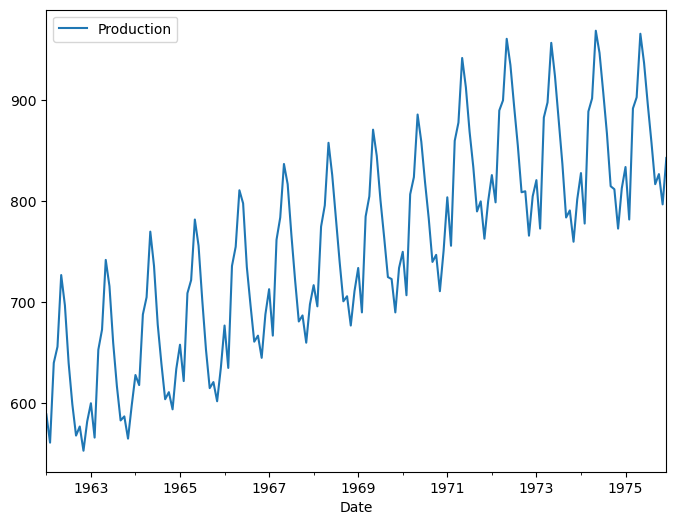

In [7]:
df.plot(figsize=(8,6))
plt.show()

In [8]:
len(df)

168

In [12]:
train=df.iloc[:140]                            #selects the first 140 rows of the DataFrame
                          #selects the rows from index 140 onwards until the end

In [13]:
train

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1973-04-01,898
1973-05-01,957
1973-06-01,924


In [14]:
test=df.iloc[140:]         #selects the rows from index 140 onwards until the end
test

,Production
Date,
1973-09-01,784
1973-10-01,791
1973-11-01,760
1973-12-01,802
1974-01-01,828
1974-02-01,778
1974-03-01,889
1974-04-01,902
1974-05-01,969


In [18]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
train1=scalar.fit_transform(train)
test1=scalar.fit_transform(test)


In [19]:
#The MinMaxScaler is commonly used for scaling numerical features to a specific range, often between 0 and 1. This scaler is helpful when you have features with different scales, and you want to bring them to a similar scale.

In [20]:
from keras.preprocessing.sequence import TimeseriesGenerator     #to generate batches of timeseries data for training the model


In [24]:
n_input=3                                                                                  # using the last 3 observations to predict the next one.
n_features=1                                                                               #The number of features (variables) in the time series data.
generator=TimeseriesGenerator(train1,train1,length=n_input,batch_size=1)                   #batch_size=1:each batch will contain a single sample.  
x,y=generator[0]                                                                           #first batch ([0]) from the TimeseriesGenerator. x is the input sequence, and y is the corresponding target sequence.
print(f'Given the array: \n{x.flatten()}')
print(f'Predict this y:\n{y}')                                                             #the sequence you want your model to predict.

Given the array: 
[0.08823529 0.01960784 0.21323529]
Predict this y:
[[0.25245098]]


In [25]:
train1[:10]

array([[0.08823529],
       [0.01960784],
       [0.21323529],
       [0.25245098],
       [0.42647059],
       [0.35294118],
       [0.21323529],
       [0.1127451 ],
       [0.03676471],
       [0.05882353]])

In [26]:
x

array([[[0.08823529],
        [0.01960784],
        [0.21323529]]])

In [27]:
generator[0]

(array([[[0.08823529],
         [0.01960784],
         [0.21323529]]]),
 array([[0.25245098]]))

In [28]:
y

array([[0.25245098]])

In [29]:
x.shape

(1, 3, 1)

In [ ]:
# doing same for 12 months

In [31]:
n_inputs=12
generator1=TimeseriesGenerator(train1,train1,length=n_inputs,batch_size=1)
generator1[0]
                               

(array([[[0.08823529],
         [0.01960784],
         [0.21323529],
         [0.25245098],
         [0.42647059],
         [0.35294118],
         [0.21323529],
         [0.1127451 ],
         [0.03676471],
         [0.05882353],
         [0.        ],
         [0.07107843]]]),
 array([[0.11519608]]))

Epoch 1/5
128/128 [==============================] - 3s 9ms/step - loss: 0.0448
Epoch 2/5
128/128 [==============================] - 1s 8ms/step - loss: 0.0212
Epoch 3/5
128/128 [==============================] - 1s 9ms/step - loss: 0.0209
Epoch 4/5
128/128 [==============================] - 1s 8ms/step - loss: 0.0231
Epoch 5/5
128/128 [==============================] - 1s 8ms/step - loss: 0.0121


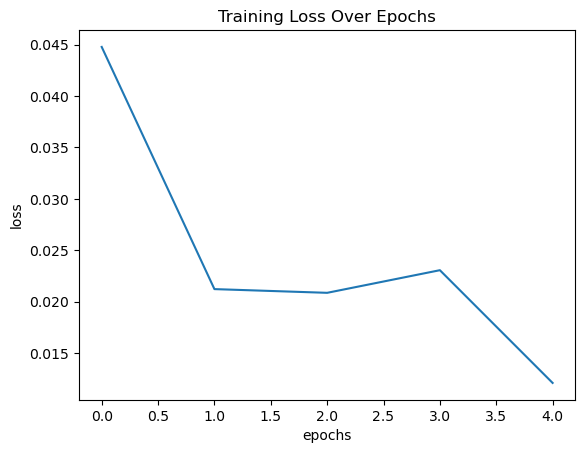

In [33]:
from keras.models import Sequential
from keras.layers import Dense,LSTM
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(n_inputs,n_features)))      #adding as LSTM layer with 100 units
model.add(Dense(1))                                                           # Adding a Dense layer with 1 unit
model.compile(optimizer='adam',loss='mse')                                    # Compiling the model with 'adam' optimizer and mean squared error (MSE) loss
model.fit(generator1,epochs=5,batch_size=1)                                   
loss_per_epoch=model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)     # Plotting the loss per epoch
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training Loss Over Epochs')
plt.show()

          

In [34]:
#taking last 12 values in the train set to make prediction of first value in test set
last_train_batch=train1[-12:]
last_train_batch

array([[0.62745098],
       [0.62990196],
       [0.52205882],
       [0.61764706],
       [0.65686275],
       [0.53921569],
       [0.80882353],
       [0.84558824],
       [0.99019608],
       [0.90931373],
       [0.80392157],
       [0.69607843]])

In [35]:
last_train_batch.shape

(12, 1)

In [36]:
last_train_batch=last_train_batch.reshape(1,n_inputs,n_features)                #preparing it for input into an LSTM layer with the specified number of time steps and features.

In [37]:
last_train_batch.shape

(1, 12, 1)

In [38]:
last_train_batch

array([[[0.62745098],
        [0.62990196],
        [0.52205882],
        [0.61764706],
        [0.65686275],
        [0.53921569],
        [0.80882353],
        [0.84558824],
        [0.99019608],
        [0.90931373],
        [0.80392157],
        [0.69607843]]])

In [40]:
pred=model.predict(last_train_batch)
pred

1/1 [==============================] - 0s 31ms/step


array([[0.69631535]], dtype=float32)

In [41]:
true_prediction=scalar.inverse_transform(pred)     # using an inverse transformation on  model's predictions to obtain the true predictions in the original scale.
true_prediction

array([[905.52985]], dtype=float32)

In [42]:
test1

array([[0.11483254],
       [0.14832536],
       [0.        ],
       [0.20095694],
       [0.32535885],
       [0.0861244 ],
       [0.61722488],
       [0.67942584],
       [1.        ],
       [0.89473684],
       [0.70813397],
       [0.51196172],
       [0.26315789],
       [0.24880383],
       [0.06220096],
       [0.25358852],
       [0.35406699],
       [0.10526316],
       [0.63157895],
       [0.68421053],
       [0.98564593],
       [0.84688995],
       [0.6507177 ],
       [0.46889952],
       [0.27272727],
       [0.32057416],
       [0.17703349],
       [0.39712919]])

In [43]:
test_prediction=[]
first_eval_batch=train1[-n_inputs:]  #last n i/p
current_batch=first_eval_batch.reshape(1,n_inputs,n_features)


In [44]:
for i in range(len(test)):
    current_pred=model.predict(current_batch)[0]    #[0] is used to extract the predicted value,#get the prediction value for the first batch
    test_prediction.append(current_pred)            #append the prediction into the array
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)     #use the prediction to update the batch and remove the first value
test_prediction    
    


1/1 [==============================] - 0s 77ms/step


[array([0.69631535], dtype=float32),
 array([0.6742292], dtype=float32),
 array([0.6754931], dtype=float32),
 array([0.69588584], dtype=float32),
 array([0.7328111], dtype=float32),
 array([0.7953561], dtype=float32),
 array([0.8762136], dtype=float32),
 array([0.9287798], dtype=float32),
 array([0.94236076], dtype=float32),
 array([0.89217186], dtype=float32),
 array([0.83043784], dtype=float32),
 array([0.79057294], dtype=float32),
 array([0.77045697], dtype=float32),
 array([0.7614564], dtype=float32),
 array([0.77197593], dtype=float32),
 array([0.800791], dtype=float32),
 array([0.8444524], dtype=float32),
 array([0.8952759], dtype=float32),
 array([0.94232273], dtype=float32),
 array([0.96500605], dtype=float32),
 array([0.9569279], dtype=float32),
 array([0.92583656], dtype=float32),
 array([0.8937358], dtype=float32),
 array([0.8699817], dtype=float32),
 array([0.8573426], dtype=float32),
 array([0.8591624], dtype=float32),
 array([0.876738], dtype=float32),
 array([0.9068001],

In [46]:
test.head(12)

,Production
Date,
1973-09-01,784
1973-10-01,791
1973-11-01,760
1973-12-01,802
1974-01-01,828
1974-02-01,778
1974-03-01,889
1974-04-01,902
1974-05-01,969


In [47]:
true_prediction=scalar.inverse_transform(test_prediction)
true_prediction

array([[905.52990776],
       [900.91390377],
       [901.17806232],
       [905.44013995],
       [913.15751851],
       [926.22942382],
       [943.12864453],
       [954.1149742 ],
       [956.95339859],
       [946.46391869],
       [933.56150836],
       [925.22974473],
       [921.02550668],
       [919.1443814 ],
       [921.34297031],
       [927.36532426],
       [936.49054766],
       [947.11266118],
       [956.94545078],
       [961.68626517],
       [959.99793017],
       [953.49984169],
       [946.79078764],
       [941.82617658],
       [939.18460357],
       [939.56493956],
       [943.23824447],
       [949.52121907]])

In [49]:
test['predictions']=true_prediction
test['predictions']

C:\Users\Athira A R\AppData\Local\Temp\ipykernel_1716\4260731095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions']=true_prediction


Date
1973-09-01    905.529908
1973-10-01    900.913904
1973-11-01    901.178062
1973-12-01    905.440140
1974-01-01    913.157519
1974-02-01    926.229424
1974-03-01    943.128645
1974-04-01    954.114974
1974-05-01    956.953399
1974-06-01    946.463919
1974-07-01    933.561508
1974-08-01    925.229745
1974-09-01    921.025507
1974-10-01    919.144381
1974-11-01    921.342970
1974-12-01    927.365324
1975-01-01    936.490548
1975-02-01    947.112661
1975-03-01    956.945451
1975-04-01    961.686265
1975-05-01    959.997930
1975-06-01    953.499842
1975-07-01    946.790788
1975-08-01    941.826177
1975-09-01    939.184604
1975-10-01    939.564940
1975-11-01    943.238244
1975-12-01    949.521219
Name: predictions, dtype: float64

In [50]:
test.head()

,Production,predictions
Date,,
1973-09-01,784,905.529908
1973-10-01,791,900.913904
1973-11-01,760,901.178062
1973-12-01,802,905.440140
1974-01-01,828,913.157519


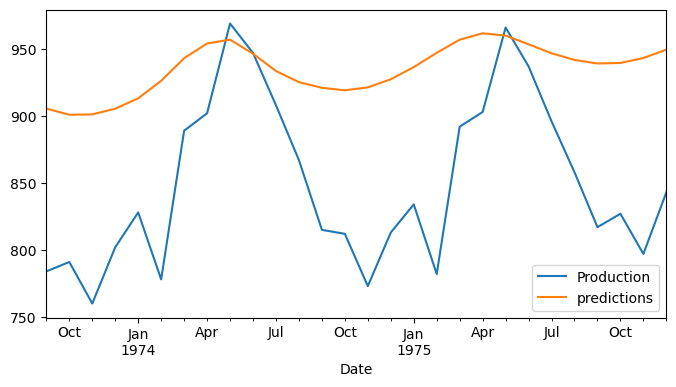

In [51]:
test.plot(figsize=(8,4))
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(